Loading Dataset and Preprocessing

In [1]:
# Install packages #
# !pip install jupyter
# !pip install numpy
# !pip install matplotlib
# !pip install math
# !pip install torch
# !pip install xlrd
# !pip install pandas
# !pip install torchvision

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import copy
import random
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torch import Tensor
from torch.optim.optimizer import (Optimizer, required, _use_grad_for_differentiable, _default_to_fused_or_foreach,
                        _differentiable_doc, _foreach_doc, _maximize_doc)
from typing import List, Optional

In [5]:
### BMI Dataset

# Loading training data
dataset = pd.read_csv("bmi_train.csv")
dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True) #Gender -> boolean
dataset = dataset.to_numpy()

# Splitting off 80% of data for training, 20% for validation
train_split = int(0.8 * len(dataset))
X_train = dataset[:train_split, [0,1,2]]
y_train = dataset[:train_split, 3]
X_test = dataset[train_split:, [0,1,2]]
y_test = dataset[train_split:, 3]
print(X_train)
print(y_train)

# Loading prediction data
prediction_dataset = pd.read_csv("bmi_validation.csv")
prediction_dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True) #Gender -> boolean
X_prediction = prediction_dataset.to_numpy()

# Normalize data set
X_train_normalized = (X_train - X_train.min(0)) / (X_train.max(0) - X_train.min(0))
X_test_normalized = (X_test - X_test.min(0)) / (X_test.max(0) - X_test.min(0))
X_prediction_normalized = (X_prediction - X_prediction.min(0)) / (X_prediction.max(0) - X_prediction.min(0))

# Turn data to tensor
X_train_tensor = torch.from_numpy(X_train_normalized)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test_normalized)
y_test_tensor = torch.from_numpy(y_test)
X_prediction_tensor = torch.from_numpy(X_prediction_normalized)
print(X_train_tensor.size())
print(y_train_tensor.size())
print(X_test_tensor.size())
print(y_test_tensor.size())

# Learning Rate and Batch size
dataset_name = "BMI Datset"
learning_rate_preset = 0.001
batch_size_preset = 10

[[  1 161  89]
 [  1 179 127]
 [  1 172 139]
 [  1 153 104]
 [  1 165  68]
 [  1 172  92]
 [  1 182 108]
 [  1 179 130]
 [  1 142  71]
 [  0 158 153]
 [  1 194 108]
 [  0 178 107]
 [  1 155  57]
 [  0 151  64]
 [  0 181  80]
 [  0 147 126]
 [  0 142 159]
 [  1 165 155]
 [  0 146 104]
 [  1 157  56]
 [  0 173  82]
 [  0 170 102]
 [  0 190 118]
 [  0 168 140]
 [  0 153  78]
 [  1 188 123]
 [  0 162  64]
 [  1 182 104]
 [  1 194 115]
 [  0 185 102]
 [  1 178  52]
 [  0 192  90]
 [  1 147 142]
 [  1 152 103]
 [  0 169  54]
 [  1 178 127]
 [  1 165 105]
 [  0 172  67]
 [  1 140 129]
 [  1 141  86]
 [  0 172  96]
 [  1 191  96]
 [  0 147 107]
 [  1 197 119]
 [  0 162 159]
 [  1 173 139]
 [  1 185 139]
 [  0 152  90]
 [  1 163 131]
 [  1 188 141]
 [  1 189 104]
 [  0 165  57]
 [  1 185  76]
 [  0 157 110]
 [  1 179  56]
 [  0 186 143]
 [  0 195 104]
 [  0 141 126]
 [  1 148 141]
 [  0 191  54]
 [  0 150  70]
 [  1 170  95]
 [  0 153  77]
 [  1 179 152]
 [  1 184 157]
 [  1 154 112]
 [  1 190 

In [ ]:
### Epsilon Pascal Challenge Dataset

# Loading training data
dataset = pd.read_csv("epsilon_normalized", sep=' ', header=None, nrows=20000)
dataset = dataset.to_numpy()
for i in range(1, dataset.shape[1]-1):
    dataset[:, i] = [float(value.split(':')[1]) if isinstance(value, str) else value for value in dataset[:, i]]
dataset = dataset[:, :-1]
np.random.shuffle(dataset)

for i in range(1, dataset.shape[0]):
    if dataset[i - 1, 0] == -1:
        dataset[i - 1, 0] = 0


# Splitting off data for training and validation
train_split = int(0.8 * len(dataset))
X_train = dataset[:train_split, 1:].astype(np.float32)
y_train = dataset[:train_split, 0].astype(np.float32)
X_test = dataset[train_split:, 1:].astype(np.float32)
y_test = dataset[train_split:, 0].astype(np.float32)
print(X_train)
print(y_train)

# Normalize data set
X_train_normalized = X_train
X_test_normalized = X_test

# Turn data to tensor
X_train_tensor = torch.from_numpy(X_train_normalized)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test_normalized)
y_test_tensor = torch.from_numpy(y_test)
print(X_train_tensor.size())
print(y_train_tensor.size())
print(X_test_tensor.size())
print(y_test_tensor.size())

# Preset parameters
dataset_name = "Epsilon Datset"
learning_rate_preset = 0.001
batch_size_preset = 10

In [55]:
### MNIST Dataset

# Loading training data
dataset = pd.read_csv("mnist_train.csv")
dataset = dataset.to_numpy()
np.random.shuffle(dataset)

# Splitting off 80% of data for training, 20% for validation
train_split = int(0.8 * len(dataset))
X_train = dataset[:train_split, 1:].astype(np.int32)
y_train = dataset[:train_split, 0].astype(np.int32)
X_test = dataset[train_split:, 1:].astype(np.int32)
y_test = dataset[train_split:, 0].astype(np.int32)
print(X_train)
print(y_train)

# Loading prediction data
prediction_dataset = pd.read_csv("mnist_test.csv")
X_prediction = prediction_dataset.to_numpy()

# Normalize data set
denominator = X_train.max(0) - X_train.min(0)
X_train_normalized = (X_train - X_train.min(0)) / np.where(denominator != 0, denominator, 1)
denominator = X_test.max(0) - X_test.min(0)
X_test_normalized = (X_test - X_test.min(0)) / np.where(denominator != 0, denominator, 1)
denominator = X_prediction.max(0) - X_prediction.min(0)
X_prediction_normalized = (X_prediction - X_prediction.min(0)) / np.where(denominator != 0, denominator, 1)

# Turn data to tensor
X_train_tensor = torch.from_numpy(X_train_normalized)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test_normalized)
y_test_tensor = torch.from_numpy(y_test)
X_prediction_tensor = torch.from_numpy(X_prediction_normalized)
print(X_train_tensor.size())
print(y_train_tensor.size())
print(X_test_tensor.size())
print(y_test_tensor.size())

# Learning Rate and Batch size
dataset_name = "MNIST Datset"
learning_rate_preset = 0.001
batch_size_preset = 10

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[8 5 7 ... 1 4 1]
torch.Size([47999, 784])
torch.Size([47999])
torch.Size([12000, 784])
torch.Size([12000])


In [ ]:
### gisette Dataset
#2 class, 6000 data points, ~5000 features

# Loading training data
dataset = pd.read_csv("gisette_scale", sep=' ', header=None)
dataset = dataset.to_numpy()
for i in range(1, dataset.shape[1]-1):
    dataset[:, i] = [float(value.split(':')[1]) if isinstance(value, str) else value for value in dataset[:, i]]
dataset = dataset[:, :-2]
np.random.shuffle(dataset)

for i in range(1, dataset.shape[0]):
    if dataset[i - 1, 0] == -1:
        dataset[i - 1, 0] = 0

#print(dataset)
#print(dataset.shape)

# Splitting off data for training and validation
train_split = int(0.8 * len(dataset))
X_train = dataset[:train_split, 1:].astype(np.float32)
y_train = dataset[:train_split, 0].astype(np.float32)
X_test = dataset[train_split:, 1:].astype(np.float32)
y_test = dataset[train_split:, 0].astype(np.float32)
print(X_train)
print(y_train)

# Normalize data set
denominator = X_train.max(0) - X_train.min(0)
X_train_normalized = (X_train - X_train.min(0)) / np.where(denominator != 0, denominator, 1)
denominator = X_test.max(0) - X_test.min(0)
X_test_normalized = (X_test - X_test.min(0)) / np.where(denominator != 0, denominator, 1)

print("X_train_normalized: ", X_train_normalized)
print("X_test_normalized: ", X_test_normalized)

# Turn data to tensor
X_train_tensor = torch.from_numpy(X_train_normalized)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test_normalized)
y_test_tensor = torch.from_numpy(y_test)
print(X_train_tensor.size())
print(y_train_tensor.size())
print(X_test_tensor.size())
print(y_test_tensor.size())

# Learning Rate and Batch size
dataset_name = "Gisette Datset"
learning_rate_preset = 0.005
batch_size_preset = 100

Global Functions

In [7]:
# Train and test error rate analysis function
def calculate_error_rate(X, y, predict):
    num_samples = X.shape[0]
    error_count = torch.count_nonzero(torch.round(predict) - y)
    error_rate = error_count / num_samples
    return error_rate

Custom Vanilia Gradient Descent

In [ ]:
# Show Dataset Name
print(f'Current Dataset: {dataset_name}')

# Vanilia Gradient Descent Algorithms
def gradient_descent(X, y, learning_rate, num_epochs):
    num_samples, num_features = X.shape
    
    # Initialize weights and bias
    w = np.zeros(num_features)
    b = 0

    loss_history = []
    error_history = []
    
    for epoch in range(num_epochs):
        # Calculate predictions
        y_pred = np.dot(X, w) + b
        
        # Calculate the difference between predictions and actual values
        error = y_pred - y
        
        # Calculate the gradient
        w_gradient = (1/num_samples) * np.dot(X.T, error)
        b_gradient = (1/num_samples) * np.sum(error)
        
        # Update theta using the learning rate and gradient
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient

        # Record the loss
        loss = np.mean(np.square(error))
        loss_history.append(loss)

        # Record the error rate
        train_error_rate = calculate_error_rate(X_train_normalized,  y_train, torch.from_numpy(y_pred))
        error_history.append(train_error_rate)

        # Print the loss every specific epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Error: {train_error_rate}')
    
    return w, b, loss_history, error_history

# Train the model using gradient descent
learning_rate = learning_rate_preset
num_iterations = 100
w, b, loss_history, error_history = gradient_descent(X_train_normalized, y_train, learning_rate, num_iterations)

# Print the learned parameters
print("Learned parameters:")

for i, w_i in enumerate(w):
    print(f"w{i} =", w_i)
print("b =", b)

# Plot the training loss history
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Training Loss Rate")
plt.title("Training Loss History")
plt.show()

# Plot the error rate history
plt.plot(error_history)
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.title("Error Rate History")
plt.show()

# Calculate train error rate
y_pred = np.dot(X_train_normalized, w) + b
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, torch.from_numpy(y_pred))
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    y_pred = np.dot(X_test_normalized, w) + b
    test_error_rate = calculate_error_rate(X_test_normalized,  y_test, torch.from_numpy(y_pred))
    print("Test error rate:", test_error_rate)

Custom Stochastic Gradient Descent

In [ ]:
# Show Dataset Name
print(f'Current Dataset: {dataset_name}')

# Stochastic Gradient Descent Algorithms
def stochastic_gradient_descent(X, y, learning_rate, num_epochs, batch_size):
    num_samples, num_features = X.shape
    num_batches = num_samples // batch_size

    # Initialize weights and bias
    w = np.zeros(num_features)
    b = 0
    
    loss_history = []
    error_history = []

    for epoch in range(num_epochs):
        # Shuffle the data for each epoch
        permutation = np.random.permutation(num_samples)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for batch in range(num_batches):
            # Select the current batch
            start = batch * batch_size
            end = (batch + 1) * batch_size
            X_batch = X_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Calculate predictions
            y_pred = np.dot(X_batch, w) + b

            # Calculate the difference between predictions and actual values
            error = y_pred - y_batch

            # Calculate the gradients
            w_gradient = (1 / batch_size) * np.dot(X_batch.T, error)
            b_gradient = (1 / batch_size) * np.sum(error)

            # Update weights and bias
            w -= learning_rate * w_gradient
            b -= learning_rate * b_gradient
        
        # General Output
        y_pred = np.dot(X_train_normalized, w) + b
        error = y_pred - y_batch

        # Record the loss
        error = y_pred
        loss = np.mean(np.square(error))
        loss_history.append(loss)

        # Record the error rate
        train_error_rate = calculate_error_rate(X_train_normalized,  y_train, torch.from_numpy(y_pred))
        error_history.append(train_error_rate)

        # Print the loss every specific epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Error: {train_error_rate}')
            
    return w, b, loss_history, error_history

# Train the model using stochastic gradient descent
learning_rate = learning_rate_preset
num_epochs = 50
batch_size = batch_size_preset
w, b, loss_history, error_history = stochastic_gradient_descent(X_train_normalized, y_train, learning_rate, num_epochs, batch_size)

# Print the learned parameters
print("Learned parameters:")
for i, w_i in enumerate(w):
    print(f"w{i} =", w_i)
print("b =", b)

# Plot the training loss history
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Training Loss Rate")
plt.title("Training Loss History")
plt.show()

# Plot the error rate history
plt.plot(error_history)
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.title("Error Rate History")
plt.show()

# Calculate train error rate
y_pred = np.dot(X_train_normalized, w) + b
train_error_rate = calculate_error_rate(X_train_normalized,  y_train, torch.from_numpy(y_pred))
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    y_pred = np.dot(X_test_normalized, w) + b
    test_error_rate = calculate_error_rate(X_test_normalized,  y_test, torch.from_numpy(y_pred))
    print("Test error rate:", test_error_rate)

Pytorch SGD (It is just a Vanilia Gradient Descent... They call it SGD is confusing...)

In [ ]:
### Pytorch Vanilia Gradient Descent

# Show Dataset Name
print(f'Current Dataset: {dataset_name}')

# Define the learning rate and number of epochs
learning_rate = learning_rate_preset
num_epochs = 1000

# Define the number of features
num_features = X_train_tensor.size()[1]

# Define the model parameters (weights and bias)
w = torch.zeros(num_features, dtype=torch.float, requires_grad=True)
# w = torch.tensor([1., 1., 1.], requires_grad=True)
b = torch.zeros(1, dtype=torch.float, requires_grad=True)
# b = torch.tensor([1.], requires_grad=True)

loss_history = []
error_history = []

# Define the loss function
criterion = torch.nn.MSELoss()

# Define the optimizer (Vanilla Gradient Descent)
optimizer = torch.optim.SGD([w, b], lr=learning_rate, weight_decay=0)

# Perform gradient descent
for epoch in range(num_epochs):
    # Forward pass
    outputs = torch.matmul(X_train_tensor.float(), w) + b
    loss = criterion(outputs, y_train_tensor.float())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the loss
    loss_history.append(loss.detach().numpy())
    
    # Record the error rate
    train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
    error_history.append(train_error_rate)

    # Print the loss every specific epochs
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Error: {train_error_rate}')
        

# Print learned parameters
print('Trained weights:', w)
print('Trained bias:', b)

# Plot the training loss history
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Training Loss Rate")
plt.title("Training Loss History")
plt.show()

# Plot the error rate history
plt.plot(error_history)
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.title("Error Rate History")
plt.show()

# Calculate train error rate
outputs = torch.matmul(X_train_tensor.float(), w) + b
train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    outputs = torch.matmul(X_test_tensor.float(), w) + b
    test_error_rate = calculate_error_rate(X_test_tensor,  y_test_tensor, outputs)
    print("Test error rate:", test_error_rate)

In [ ]:
### Pytorch Stochastic Gradient Descent

# Show Dataset Name
print(f'Current Dataset: {dataset_name}')

# Define the learning rate and number of epochs and batch size
learning_rate = learning_rate_preset
num_epochs = 500
batch_size = batch_size_preset

# Define the number of samples and features
num_samples  = X_train_tensor.size()[0]
num_features = X_train_tensor.size()[1]

# Define the model parameters (weights and bias)
w = torch.zeros(num_features, dtype=torch.float, requires_grad=True)
# w = torch.tensor([1., 1., 1.], requires_grad=True)
b = torch.zeros(1, dtype=torch.float, requires_grad=True)
# b = torch.tensor([1.], requires_grad=True)

loss_history = []
error_history = []

# Define the loss function
criterion = torch.nn.MSELoss()

# Define the optimizer (Vanilla Gradient Descent)
optimizer = torch.optim.SGD([w, b], lr=learning_rate, weight_decay=0)

# Perform stochastic gradient descent
num_batches = num_samples // batch_size
for epoch in range(num_epochs):
    # Shuffle the data for each epoch
    permutation = torch.randperm(num_samples)
    X_shuffled = X_train_tensor[permutation]
    y_shuffled = y_train_tensor[permutation]
    for batch in range(num_batches):
        # Select the current batch
        start = batch * batch_size
        end = (batch + 1) * batch_size
        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        # Forward pass
        outputs = torch.matmul(X_batch.float(), w) + b
        loss = criterion(outputs, y_batch.float())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # General Output
    outputs = torch.matmul(X_train_tensor.float(), w) + b
    loss = criterion(outputs, y_train_tensor.float())

    # Record the loss
    loss_history.append(loss.detach().numpy())
    
    # Record the error rate
    train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
    error_history.append(train_error_rate)

    # Print the loss every specific epochs
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Error: {train_error_rate}')

# Print learned parameters
print('Trained weights:', w)
print('Trained bias:', b)

# Plot the training loss history
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Training Loss Rate")
plt.title("Training Loss History")
plt.show()

# Plot the error rate history
plt.plot(error_history)
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.title("Error Rate History")
plt.show()

# Calculate train error rate
outputs = torch.matmul(X_train_tensor.float(), w) + b
train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    outputs = torch.matmul(X_test_tensor.float(), w) + b
    test_error_rate = calculate_error_rate(X_test_tensor,  y_test_tensor, outputs)
    print("Test error rate:", test_error_rate)

Custom SGD Optimizer Class

In [8]:
class custom_optimizer_SGD(Optimizer):
    def __init__(self, params, lr=required, weight_decay=0 ):
        if lr is not required and lr < 0.0:
            raise ValueError(f"Invalid learning rate: {lr}")
        if weight_decay < 0.0:
            raise ValueError(f"Invalid weight_decay value: {weight_decay}")
        defaults = dict(lr=lr, weight_decay=weight_decay)
        super().__init__(params, defaults)
                
    def step(self):
        for group in self.param_groups:
            for param in group['params']:
                if param.grad is None:
                    continue
                grad = param.grad.data
                weight_decay = group['weight_decay']
                lr = group['lr']
                param.data.add_(-lr, grad)
                if weight_decay != 0:
                    param.data.add_(-lr * weight_decay, param.data)

Neural Network

In [68]:
# Define a custom neural network class
class NeuralNetwork(nn.Module):
    def __init__(self, num_features=1):
        super().__init__()
        self.flatten = nn.Flatten()
        self.activation_stack = nn.Sequential(
            nn.Linear(num_features, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.activation_stack(x)
        return torch.squeeze(logits)
    
class ConvolutionalNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(7*7*64, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 12*12*64)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

In [70]:
### Neural Network with Vanilia Gradient Descent

# Show Dataset Name
print(f'Current Dataset: {dataset_name}')

# Define the learning rate and number of epochs
learning_rate = learning_rate_preset
num_epochs = 1000

# Define the number of samples and features
num_samples  = X_train_tensor.size()[0]
num_features = X_train_tensor.size()[1]
num_class = len(torch.unique(y_train_tensor))

# Define the model parameters
loss_history = []
error_history = []

# Define neural network model, loss criterion and optimizer
criterion = torch.nn.MSELoss()
# model = NeuralNetwork(num_features)
model = ConvolutionalNeuralNetwork()
print(model)
optimizer = custom_optimizer_SGD(model.parameters(), lr=learning_rate, weight_decay = 0)

#for name, param in NeuralNetwork_model.named_parameters():
#    print( name )
#    values = torch.ones( param.shape )
#    param.data = values
    
# Perform training
model.train()
for epoch in range(num_epochs):
    # Forward propagation to obtain the predicted output
    outputs = model(X_train_tensor.float())
    
    # Calculate the loss
    loss = criterion(outputs, y_train_tensor.float())
    
    # Backward propagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record the loss
    loss_history.append(loss.detach().numpy())
    
    # Record the error rate
    train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
    error_history.append(train_error_rate)
    
    # Print the loss every specific epochs
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Error: {train_error_rate}')
        
# Print learned parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')
        
# Plot the training loss history
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Training Loss Rate")
plt.title("Training Loss History")
plt.show()

# Plot the error rate history
plt.plot(error_history)
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.title("Error Rate History")
plt.show()

# Calculate train error rate
outputs = model(X_train_tensor.float())
train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    outputs = model(X_test_tensor.float())
    test_error_rate = calculate_error_rate(X_test_tensor,  y_test_tensor, outputs)
    print("Test error rate:", test_error_rate)

Current Dataset: MNIST Datset
ConvolutionalNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [47999, 784]

In [ ]:
### Neural Network with Stochastic Gradient Descent

# Show Dataset Name
print(f'Current Dataset: {dataset_name}')

# Define the learning rate and number of epochs and batch size
learning_rate = learning_rate_preset
num_epochs = 1000
batch_size = batch_size_preset

# Define the number of samples and features
num_samples  = X_train_tensor.size()[0]
num_features = X_train_tensor.size()[1]

# Define the model parameters
loss_history = []
error_history = []

# Define neural network model, loss criterion and optimizer
criterion = torch.nn.MSELoss()
model = NeuralNetwork(num_features)
print(model)
optimizer = custom_optimizer_SGD(model.parameters(), lr=learning_rate, weight_decay = 0)

#for name, param in NeuralNetwork_model.named_parameters():
#    print( name )
#    values = torch.ones( param.shape )
#    param.data = values
    
# Perform training
model.train()
num_batches = num_samples // batch_size
for epoch in range(num_epochs):
    # Shuffle the data for each epoch
    permutation = torch.randperm(num_samples)
    X_shuffled = X_train_tensor[permutation]
    y_shuffled = y_train_tensor[permutation]
    for batch in range(num_batches):
        # Select the current batch
        start = batch * batch_size
        end = (batch + 1) * batch_size
        X_batch = X_shuffled[start:end]
        y_batch = y_shuffled[start:end]

        # Forward propagation to obtain the predicted output
        outputs = model(X_batch.float())
    
        # Calculate the loss
        loss = criterion(outputs, y_batch.float())
    
        # Backward propagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # General Output
    outputs = model(X_train_tensor.float())
    loss = criterion(outputs, y_train_tensor.float())

    # Record the loss
    loss_history.append(loss.detach().numpy())
    
    # Record the error rate
    train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
    error_history.append(train_error_rate)

    # Print the loss every specific epochs
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Error: {train_error_rate}')
        
# Print learned parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f'{name}: {param.data}')
        
# Plot the training loss history
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Training Loss Rate")
plt.title("Training Loss History")
plt.show()

# Plot the error rate history
plt.plot(error_history)
plt.xlabel("Iteration")
plt.ylabel("Error Rate")
plt.title("Error Rate History")
plt.show()

# Calculate train error rate
outputs = model(X_train_tensor.float())
train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
print("Train error rate:", train_error_rate)
    
# Calculate test error rate if test data is provided
if X_test is not None and y_test is not None:
    outputs = model(X_test_tensor.float())
    test_error_rate = calculate_error_rate(X_test_tensor,  y_test_tensor, outputs)
    print("Test error rate:", test_error_rate)

Fedearted Learning Algorithm

In [75]:
# Define a custom class for each client so they can update separately
class ClientDevice:
    def __init__(self, model, criterion, optimizer, X_train, y_train):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.X_train = X_train
        self.y_train = y_train
        self.num_samples = self.X_train.size()[0]
        self.num_features = self.X_train.size()[1]

    def load_global_weights(self, global_weights):
        self.model.load_state_dict(global_weights)

    def get_local_weights(self):
        return self.model.state_dict()

    def update_weights_GDVanilia(self, num_epochs):
        self.model.train()
        for epoch in range(num_epochs):
            # Update weight
            outputs = self.model(self.X_train.float())
            loss = self.criterion(outputs, self.y_train.float())
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        return self.model.state_dict()
    
    def update_weights_GDStochastic(self, num_epochs, batch_size):
        self.model.train()
        num_batches = self.num_samples // batch_size
        for epoch in range(num_epochs):
            # Shuffle the data for each epoch
            permutation = torch.randperm(self.num_samples)
            X_shuffled = self.X_train[permutation]
            y_shuffled = self.y_train[permutation]
            for batch in range(num_batches):
                # Select the current batch
                start = batch * batch_size
                end = (batch + 1) * batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                # Update weight
                outputs = self.model(X_batch.float())
                loss = self.criterion(outputs, y_batch.float())
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
        return self.model.state_dict()

# Define server wise functions
def send_client_weights(server_weights, local_weights):
    server_weights.append(local_weights)

# Total weight processing functions
def Federated_Averaging(client_weights_total):
    aggregate_weights = {}
    num_clients = len(client_weights_total)
    
    # Iterate over the parameters of the model
    for param_name in client_weights_total[0].keys():
        # Initialize the aggregated parameter tensor
        aggregated_param = client_weights_total[0][param_name].clone()

        # Sum the parameter tensors from all clients
        for client_weights in client_weights_total[1:]:
            aggregated_param += client_weights[param_name]

        # Calculate the average parameter value
        aggregated_param /= num_clients

        # Assign the averaged parameter to the aggregate_weights dictionary
        aggregate_weights[param_name] = aggregated_param

    return aggregate_weights

In [77]:
### Federated Learning Training with vanilia gradient descent method
def FedLearnTrainGDVanilia(num_clients, local_update_epochs, loss_cost_history_total, error_cost_history_total, send_cost_history_total):
    # Define neural network model, loss criterion and optimizer
    model = NeuralNetwork(X_train_tensor.size()[1])
    criterion = torch.nn.MSELoss()
    optimizer = custom_optimizer_SGD(model.parameters(), lr=learning_rate)

    # Preprocess the client data
    X_train_client = [None] * num_clients
    y_train_client = [None] * num_clients
    client_row = math.floor( X_train_tensor.size(dim=0) / num_clients )
    for client in range(num_clients):
        X_train_client[client] = X_train_tensor[(client)*client_row : (client+1)*client_row]
        y_train_client[client] = y_train_tensor[(client)*client_row : (client+1)*client_row]

    # Establish client devices
    client_model = [None] * num_clients
    client_optimizer = [None] * num_clients
    client_device = [None] * num_clients
    client_weights = [None] * num_clients
    for client in range(num_clients):
        client_model[client] = NeuralNetwork(X_train_client[client].size()[1])
        client_optimizer[client] = custom_optimizer_SGD(client_model[client].parameters(), lr=learning_rate)
        client_device[client] = ClientDevice(client_model[client], criterion, client_optimizer[client], X_train_client[client], y_train_client[client])

    # Cost History
    loss_cost_history = []
    error_cost_history = []
    send_cost_history = []
    send_cost = 0

    # Perform training
    global_weights = model.state_dict()
    #print(f'Initial global weights are: {global_weights}')
    for epoch in range(num_epochs):
        client_weights_total = []

        # Clients local update
        for client in range(num_clients):
            # Transmit the global weight to clients
            client_device[client].load_global_weights(global_weights)
            client_weights[client] = client_device[client].update_weights_GDVanilia(local_update_epochs)

            # Send client weights to the server
            send_client_weights(client_weights_total, client_weights[client])
            client_weights_size = client_weights[client]['activation_stack.0.weight']
            send_cost = send_cost + client_weights_size.numel()

        # Aggregate client weights on the server
        aggregated_weights = Federated_Averaging(client_weights_total)

        # Update global weights with aggregated weights
        global_weights.update(aggregated_weights)
        model.load_state_dict(global_weights)

        # General Output
        outputs = model(X_train_tensor.float())
        loss = criterion(outputs, y_train_tensor.float())

        # Record the loss
        loss_cost_history.append(loss.item())

        # Record the error rate
        train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
        error_cost_history.append(train_error_rate)

        # Record the send cost
        send_cost_history.append(send_cost)

        # Print the loss every specific epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Error: {train_error_rate:.16f}, Culminative Send Cost: {send_cost}')

    # Print learned parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.data}')

    # Plot send cost history
    plt.plot(send_cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Send Cost")
    plt.title("Send Cost History")
    plt.show()
    print(f'Total send cost: {send_cost}')

    # Plot the training loss history
    plt.plot(loss_cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Training Loss Rate")
    plt.title("Training Loss History")
    plt.show()

    # Plot the error rate history
    plt.plot(error_cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Error Rate")
    plt.title("Error Rate History")
    plt.show()

    # Calculate train error rate
    outputs = model(X_train_tensor.float())
    train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
    print("Train error rate:", train_error_rate)
        
    # Calculate test error rate if test data is provided
    if X_test is not None and y_test is not None:
        outputs = model(X_test_tensor.float())
        test_error_rate = calculate_error_rate(X_test_tensor,  y_test_tensor, outputs)
        print("Test error rate:", test_error_rate)

    # Record the history of loss, error and send_cost
    loss_cost_history_total.append(loss_cost_history)
    error_cost_history_total.append(error_cost_history)
    send_cost_history_total.append(send_cost_history)

In [78]:
### Federated Learning Training with stochastic gradient descent method
def FedLearnTrainGDStochastic(num_clients, local_update_epochs, loss_cost_history_total, error_cost_history_total, send_cost_history_total):
    # Define neural network model, loss criterion and optimizer
    model = NeuralNetwork(X_train_tensor.size()[1])
    criterion = torch.nn.MSELoss()
    optimizer = custom_optimizer_SGD(model.parameters(), lr=learning_rate)

    # Preprocess the client data
    X_train_client = [None] * num_clients
    y_train_client = [None] * num_clients
    client_row = math.floor( X_train_tensor.size(dim=0) / num_clients )
    for client in range(num_clients):
        X_train_client[client] = X_train_tensor[(client)*client_row : (client+1)*client_row]
        y_train_client[client] = y_train_tensor[(client)*client_row : (client+1)*client_row]

    # Establish client devices
    client_model = [None] * num_clients
    client_optimizer = [None] * num_clients
    client_device = [None] * num_clients
    client_weights = [None] * num_clients
    for client in range(num_clients):
        client_model[client] = NeuralNetwork(X_train_client[client].size()[1])
        client_optimizer[client] = custom_optimizer_SGD(client_model[client].parameters(), lr=learning_rate)
        client_device[client] = ClientDevice(client_model[client], criterion, client_optimizer[client], X_train_client[client], y_train_client[client])

    # Cost History
    loss_cost_history = []
    error_cost_history = []
    send_cost_history = []
    send_cost = 0

    # Perform training
    global_weights = model.state_dict()
    #print(f'Initial global weights are: {global_weights}')
    for epoch in range(num_epochs):
        client_weights_total = []

        # Clients local update
        for client in range(num_clients):
            # Transmit the global weight to clients
            client_device[client].load_global_weights(global_weights)
            client_weights[client] = client_device[client].update_weights_GDStochastic(local_update_epochs, int(batch_size / num_clients))

            # Send client weights to the server
            send_client_weights(client_weights_total, client_weights[client])
            client_weights_size = client_weights[client]['activation_stack.0.weight']
            send_cost = send_cost + client_weights_size.numel()

        # Aggregate client weights on the server
        aggregated_weights = Federated_Averaging(client_weights_total)

        # Update global weights with aggregated weights
        global_weights.update(aggregated_weights)
        model.load_state_dict(global_weights)

        # General Output
        outputs = model(X_train_tensor.float())
        loss = criterion(outputs, y_train_tensor.float())

        # Record the loss
        loss_cost_history.append(loss.item())

        # Record the error rate
        train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
        error_cost_history.append(train_error_rate)

        # Record the send cost
        send_cost_history.append(send_cost)

        # Print the loss every specific epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}, Error: {train_error_rate:.16f}, Culminative Send Cost: {send_cost}')

    # Print learned parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(f'{name}: {param.data}')

    # Plot send cost history
    plt.plot(send_cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Send Cost")
    plt.title("Send Cost History")
    plt.show()
    print(f'Total send cost: {send_cost}')

    # Plot the training loss history
    plt.plot(loss_cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Training Loss Rate")
    plt.title("Training Loss History")
    plt.show()

    # Plot the error rate history
    plt.plot(error_cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Error Rate")
    plt.title("Error Rate History")
    plt.show()

    # Calculate train error rate
    outputs = model(X_train_tensor.float())
    train_error_rate = calculate_error_rate(X_train_tensor,  y_train_tensor, outputs)
    print("Train error rate:", train_error_rate)
        
    # Calculate test error rate if test data is provided
    if X_test is not None and y_test is not None:
        outputs = model(X_test_tensor.float())
        test_error_rate = calculate_error_rate(X_test_tensor,  y_test_tensor, outputs)
        print("Test error rate:", test_error_rate)

    # Record the history of loss, error and send_cost
    loss_cost_history_total.append(loss_cost_history)
    error_cost_history_total.append(error_cost_history)
    send_cost_history_total.append(send_cost_history)

Current Dataset: MNIST Datset
=== The training for num_clients is 1 ===
Epoch [1/500], Loss: 26.09107780, Error: 0.8983728885650635, Culminative Send Cost: 784
Epoch [10/500], Loss: 12.50458336, Error: 0.8506427407264709, Culminative Send Cost: 7840
Epoch [20/500], Loss: 8.86597347, Error: 0.8953311443328857, Culminative Send Cost: 15680
Epoch [30/500], Loss: 7.83944845, Error: 0.8993104100227356, Culminative Send Cost: 23520
Epoch [40/500], Loss: 7.36931515, Error: 0.8988520503044128, Culminative Send Cost: 31360
Epoch [50/500], Loss: 7.04467392, Error: 0.8968103528022766, Culminative Send Cost: 39200
Epoch [60/500], Loss: 6.77942705, Error: 0.8954561352729797, Culminative Send Cost: 47040
Epoch [70/500], Loss: 6.55219889, Error: 0.8939352631568909, Culminative Send Cost: 54880
Epoch [80/500], Loss: 6.35501242, Error: 0.8934352993965149, Culminative Send Cost: 62720
Epoch [90/500], Loss: 6.18308306, Error: 0.8922477364540100, Culminative Send Cost: 70560
Epoch [100/500], Loss: 6.03272

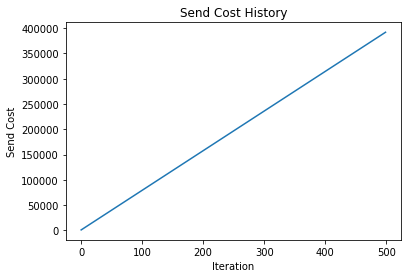

Total send cost: 392000


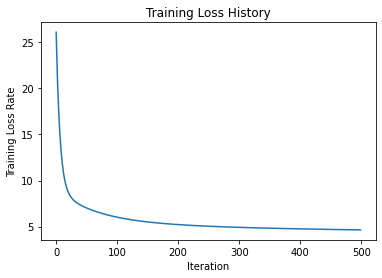

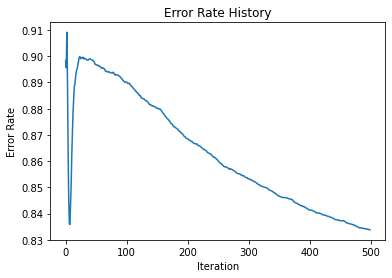

Train error rate: tensor(0.8337)
Test error rate: tensor(0.8318)
=== The training for num_clients is 5 ===
Epoch [1/500], Loss: 25.60267448, Error: 0.9017896056175232, Culminative Send Cost: 3920
Epoch [10/500], Loss: 12.31190109, Error: 0.8370799422264099, Culminative Send Cost: 39200
Epoch [20/500], Loss: 8.74978065, Error: 0.8839350938796997, Culminative Send Cost: 78400
Epoch [30/500], Loss: 7.74312639, Error: 0.8941436409950256, Culminative Send Cost: 117600
Epoch [40/500], Loss: 7.28155279, Error: 0.8948936462402344, Culminative Send Cost: 156800
Epoch [50/500], Loss: 6.96306324, Error: 0.8948727846145630, Culminative Send Cost: 196000
Epoch [60/500], Loss: 6.70328808, Error: 0.8944978117942810, Culminative Send Cost: 235200
Epoch [70/500], Loss: 6.48118067, Error: 0.8933519721031189, Culminative Send Cost: 274400
Epoch [80/500], Loss: 6.28881836, Error: 0.8918519020080566, Culminative Send Cost: 313600
Epoch [90/500], Loss: 6.12142849, Error: 0.8905602097511292, Culminative Send

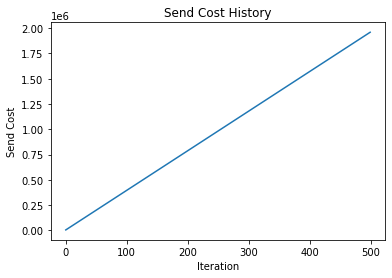

Total send cost: 1960000


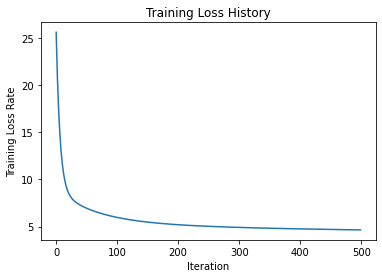

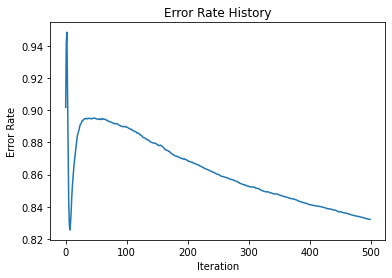

Train error rate: tensor(0.8322)
Test error rate: tensor(0.8322)
=== The training for num_clients is 10 ===
Epoch [1/500], Loss: 25.32299614, Error: 0.9365611672401428, Culminative Send Cost: 7840
Epoch [10/500], Loss: 12.62017918, Error: 0.8513927459716797, Culminative Send Cost: 78400
Epoch [20/500], Loss: 9.14918804, Error: 0.8998520970344543, Culminative Send Cost: 156800
Epoch [30/500], Loss: 8.11505699, Error: 0.9027687907218933, Culminative Send Cost: 235200
Epoch [40/500], Loss: 7.60893345, Error: 0.9028104543685913, Culminative Send Cost: 313600
Epoch [50/500], Loss: 7.24791574, Error: 0.9027271270751953, Culminative Send Cost: 392000
Epoch [60/500], Loss: 6.95063448, Error: 0.9012062549591064, Culminative Send Cost: 470400
Epoch [70/500], Loss: 6.69597530, Error: 0.8994979262351990, Culminative Send Cost: 548800
Epoch [80/500], Loss: 6.47544956, Error: 0.8976020216941833, Culminative Send Cost: 627200
Epoch [90/500], Loss: 6.28368711, Error: 0.8958103060722351, Culminative Se

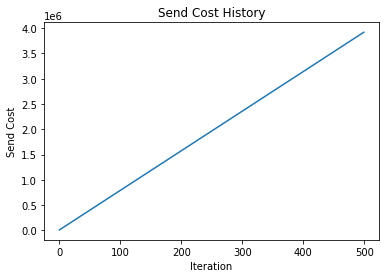

Total send cost: 3920000


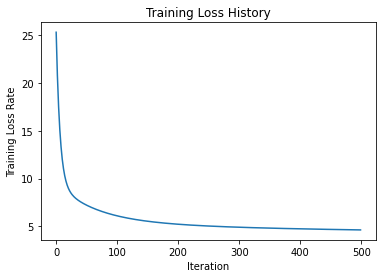

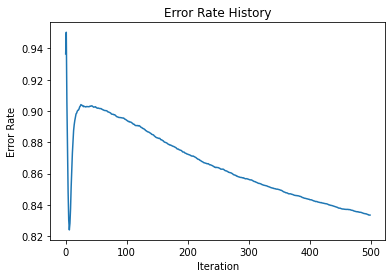

Train error rate: tensor(0.8335)
Test error rate: tensor(0.8322)
=== The training for num_clients is 15 ===
Epoch [1/500], Loss: 24.07211876, Error: 0.9539365172386169, Culminative Send Cost: 11760
Epoch [10/500], Loss: 12.40866852, Error: 0.8604554533958435, Culminative Send Cost: 117600
Epoch [20/500], Loss: 9.17733097, Error: 0.8969562053680420, Culminative Send Cost: 235200
Epoch [30/500], Loss: 8.17977047, Error: 0.9003937840461731, Culminative Send Cost: 352800
Epoch [40/500], Loss: 7.67176962, Error: 0.8997062444686890, Culminative Send Cost: 470400
Epoch [50/500], Loss: 7.30263376, Error: 0.9006854295730591, Culminative Send Cost: 588000
Epoch [60/500], Loss: 6.99714565, Error: 0.9005395770072937, Culminative Send Cost: 705600
Epoch [70/500], Loss: 6.73523951, Error: 0.8994145989418030, Culminative Send Cost: 823200
Epoch [80/500], Loss: 6.50848770, Error: 0.8982270359992981, Culminative Send Cost: 940800
Epoch [90/500], Loss: 6.31141424, Error: 0.8961228132247925, Culminative 

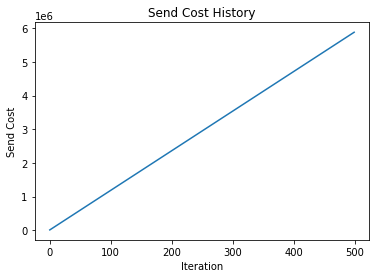

Total send cost: 5880000


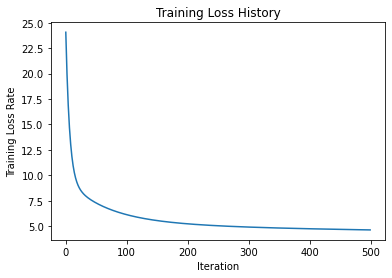

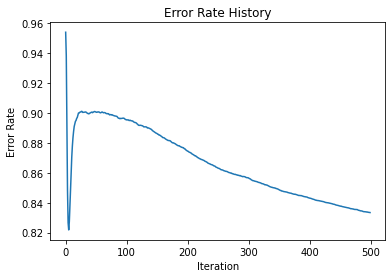

Train error rate: tensor(0.8334)
Test error rate: tensor(0.8327)
=== The training for num_clients is 20 ===
Epoch [1/500], Loss: 25.41771698, Error: 0.9191858172416687, Culminative Send Cost: 15680
Epoch [10/500], Loss: 12.46138763, Error: 0.8386424779891968, Culminative Send Cost: 156800
Epoch [20/500], Loss: 8.95238209, Error: 0.8911852240562439, Culminative Send Cost: 313600
Epoch [30/500], Loss: 7.93172598, Error: 0.8966020345687866, Culminative Send Cost: 470400
Epoch [40/500], Loss: 7.44652748, Error: 0.8968728780746460, Culminative Send Cost: 627200
Epoch [50/500], Loss: 7.10558796, Error: 0.8961853384971619, Culminative Send Cost: 784000
Epoch [60/500], Loss: 6.82621050, Error: 0.8950811624526978, Culminative Send Cost: 940800
Epoch [70/500], Loss: 6.58728838, Error: 0.8943936228752136, Culminative Send Cost: 1097600
Epoch [80/500], Loss: 6.38055658, Error: 0.8933102488517761, Culminative Send Cost: 1254400
Epoch [90/500], Loss: 6.20088959, Error: 0.8923310637474060, Culminativ

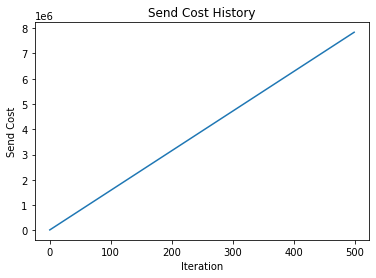

Total send cost: 7840000


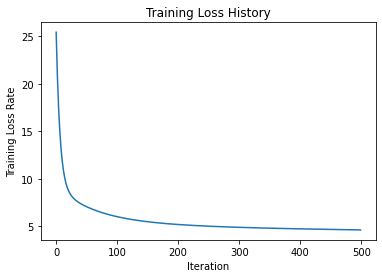

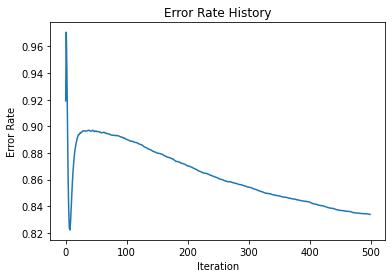

Train error rate: tensor(0.8339)
Test error rate: tensor(0.8310)
=== The Experiment Result ===
Current Dataset: MNIST Datset
Vanilia Gradient Descent


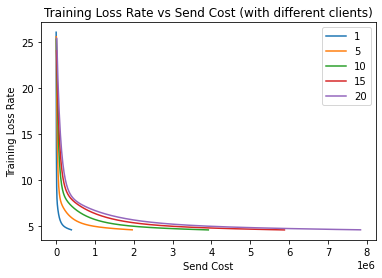

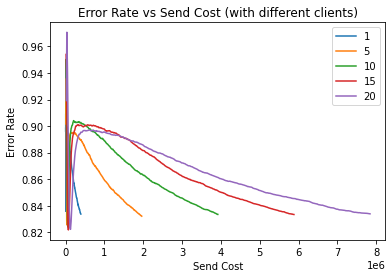

<Figure size 432x288 with 0 Axes>

In [79]:
### Experiment for num_clients with Vanilia Gradient Descent

# Show Dataset Name
print(f'Current Dataset: {dataset_name}')

# Define the learning rate and number of epochs
learning_rate = learning_rate_preset
num_epochs = 500
num_clients_list = [1,5,10,15,20]
local_update_epochs_list = [1]

# Cost History Total
num_clients_list_size = len(num_clients_list)
local_update_epochs_list_size = len(local_update_epochs_list)
loss_cost_history_total = []
error_cost_history_total = []
send_cost_history_total = []

# Compare the num_clients
local_update_epochs = local_update_epochs_list[0]
for num_clients in num_clients_list:
    print(f'=== The training for num_clients is {num_clients} ===')
    FedLearnTrainGDVanilia(num_clients, local_update_epochs, loss_cost_history_total, error_cost_history_total, send_cost_history_total)

print(f'=== The Experiment Result ===')
# Show Dataset Name
print(f'Current Dataset: {dataset_name}')
print("Vanilia Gradient Descent")

# Plot the training loss rate between cost history with clients
for i in range(num_clients_list_size):
    plt.plot(send_cost_history_total[i], loss_cost_history_total[i])
plt.xlabel("Send Cost")
plt.ylabel("Training Loss Rate")
plt.title("Training Loss Rate vs Send Cost (with different clients)")
plt.legend(num_clients_list)
plt.show()
plt.savefig(f'Loss_VS_SendCost_num_clients_{dataset_name}_VGD.png')

# Plot the error rate between cost history with clients
for i in range(num_clients_list_size):
    plt.plot(send_cost_history_total[i], error_cost_history_total[i])
plt.xlabel("Send Cost")
plt.ylabel("Error Rate")
plt.title("Error Rate vs Send Cost (with different clients)")
plt.legend(num_clients_list)
plt.show()
plt.savefig(f'ErrorRate_VS_SendCost_num_clients_{dataset_name}_VGD.png')

In [ ]:
### Experiment for num_clients with Stochastic Gradient Descent

# Show Dataset Name
print(f'Current Dataset: {dataset_name}')

# Define the learning rate and number of epochs
learning_rate = learning_rate_preset
num_epochs = 100
batch_size = batch_size_preset
num_clients_list = [1,5,10,15,20]
local_update_epochs_list = [2]

# Cost History Total
num_clients_list_size = len(num_clients_list)
local_update_epochs_list_size = len(local_update_epochs_list)
loss_cost_history_total = []
error_cost_history_total = []
send_cost_history_total = []

# Compare the num_clients
local_update_epochs = local_update_epochs_list[0]
for num_clients in num_clients_list:
    print(f'=== The training for num_clients is {num_clients} ===')
    FedLearnTrainGDStochastic(num_clients, local_update_epochs, loss_cost_history_total, error_cost_history_total, send_cost_history_total)

print(f'=== The Experiment Result ===')
# Show Dataset Name
print(f'Current Dataset: {dataset_name}')
print("Stochastic Gradient Descent")

# Plot the training loss rate between cost history with clients
for i in range(num_clients_list_size):
    plt.plot(send_cost_history_total[i], loss_cost_history_total[i])
plt.xlabel("Send Cost")
plt.ylabel("Training Loss Rate")
plt.title("Training Loss Rate vs Send Cost (with different clients)")
plt.legend(num_clients_list)
plt.show()
plt.savefig(f'Loss_VS_SendCost_num_clients_{dataset_name}_SGD.png')

# Plot the error rate between cost history with clients
for i in range(num_clients_list_size):
    plt.plot(send_cost_history_total[i], error_cost_history_total[i])
plt.xlabel("Send Cost")
plt.ylabel("Error Rate")
plt.title("Error Rate vs Send Cost (with different clients)")
plt.legend(num_clients_list)
plt.show()
plt.savefig(f'ErrorRate_VS_SendCost_num_clients_{dataset_name}_SGD.png')

In [ ]:
### Experiment for local_update_epochs with Vanilia Gradient Descent

# Show Dataset Name
print(f'Current Dataset: {dataset_name}')

# Define the learning rate and number of epochs
learning_rate = learning_rate_preset
num_epochs = 1000
num_clients_list = [5]
local_update_epochs_list = [1,2,3,4,5]

# Cost History Total
num_clients_list_size = len(num_clients_list)
local_update_epochs_list_size = len(local_update_epochs_list)
loss_cost_history_total = []
error_cost_history_total = []
send_cost_history_total = []

# Compare the local_update_epochs
num_clients = num_clients_list[0]
for local_update_epochs in local_update_epochs_list:
    print(f'=== The training for local_update_epochs is {local_update_epochs} ===')
    FedLearnTrainGDVanilia(num_clients, local_update_epochs, loss_cost_history_total, error_cost_history_total, send_cost_history_total)

print(f'=== The Experiment Result ===')
# Show Dataset Name
print(f'Current Dataset: {dataset_name}')
print("Vanilia Gradient Descent")

# Plot the training loss rate between cost history with local update epochs
for i in range(local_update_epochs_list_size):
    plt.plot(send_cost_history_total[i], loss_cost_history_total[i])
plt.xlabel("Send Cost")
plt.ylabel("Training Loss Rate")
plt.title("Training Loss Rate vs Send Cost (with different local update epochs)")
plt.legend(local_update_epochs_list)
plt.show()
plt.savefig(f'Loss_VS_SendCost_local_update_epochs_{dataset_name}_VGD.png')

# Plot the error rate between cost history with local update epochs
for i in range(local_update_epochs_list_size):
    plt.plot(send_cost_history_total[i], error_cost_history_total[i])
plt.xlabel("Send Cost")
plt.ylabel("Error Rate")
plt.title("Error Rate vs Send Cost (with different local update epochs)")
plt.legend(local_update_epochs_list)
plt.show()
plt.savefig(f'ErrorRate_VS_SendCost_local_update_epochs_{dataset_name}_VGD.png')

In [ ]:
### Experiment for local_update_epochs with Stochastic Gradient Descent

# Show Dataset Name
print(f'Current Dataset: {dataset_name}')

# Define the learning rate and number of epochs
learning_rate = learning_rate_preset
num_epochs = 500
batch_size = batch_size_preset
num_clients_list = [2]
local_update_epochs_list = [1,2,3,4,5]

# Cost History Total
num_clients_list_size = len(num_clients_list)
local_update_epochs_list_size = len(local_update_epochs_list)
loss_cost_history_total = []
error_cost_history_total = []
send_cost_history_total = []

# Compare the local_update_epochs
num_clients = num_clients_list[0]
for local_update_epochs in local_update_epochs_list:
    print(f'=== The training for local_update_epochs is {local_update_epochs} ===')
    FedLearnTrainGDStochastic(num_clients, local_update_epochs, loss_cost_history_total, error_cost_history_total, send_cost_history_total)

print(f'=== The Experiment Result ===')
# Show Dataset Name
print(f'Current Dataset: {dataset_name}')
print("Stochastic Gradient Descent")

# Plot the training loss rate between cost history with local update epochs
for i in range(local_update_epochs_list_size):
    plt.plot(send_cost_history_total[i], loss_cost_history_total[i])
plt.xlabel("Send Cost")
plt.ylabel("Training Loss Rate")
plt.title("Training Loss Rate vs Send Cost (with different local update epochs)")
plt.legend(local_update_epochs_list)
plt.show()
plt.savefig(f'Loss_VS_SendCost_local_update_epochs_{dataset_name}_SGD.png')

# Plot the error rate between cost history with local update epochs
for i in range(local_update_epochs_list_size):
    plt.plot(send_cost_history_total[i], error_cost_history_total[i])
plt.xlabel("Send Cost")
plt.ylabel("Error Rate")
plt.title("Error Rate vs Send Cost (with different local update epochs)")
plt.legend(local_update_epochs_list)
plt.show()
plt.savefig(f'ErrorRate_VS_SendCost_local_update_epochs_{dataset_name}_SGD.png')